In [1]:
from Beam_trace import *

In [2]:
def add_achromat(s,f,DISZ):
    """Add Thorlabs achromat f=focal length (needs to be one of the available)
        s=lens system, DISZ = distance after lens
    """
    if f==250:
        #f=250 achromat
        s.add_surface(surface(7.5, 7.294478080093399900E-003   ,1.5139))
        s.add_surface(surface(2, -8.953353030709999500E-003   ,1.6411))
        s.add_surface(surface(DISZ, -2.177700348432099900E-003  ,1))
    elif f==200:
       #f=200 achromat
        s.add_surface(surface(8.5,  9.102494083378799600E-003    ,1.5139))
        s.add_surface(surface(2,  -1.073998496402110000E-002  ,1.6411))
        s.add_surface(surface(DISZ,  -2.657807308970099800E-003  ,1))
    elif f==150:    
        #f=150 achromat
        s.add_surface(surface(12,1.202212070209180000E-2 ,1.514))
        s.add_surface(surface(3,-1.386577925679420000E-002 ,1.6656))
        s.add_surface(surface(DISZ,-4.037141703673800000E-003 ,1))
    elif f==100:    
        #f=100 achromat
        s.add_surface(surface(16, 1.406074240719910000E-002  ,1.665))
        s.add_surface(surface(4,-2.263980076975320000E-002  ,1.7196))
        s.add_surface(surface(DISZ, -2.754062241806699900E-003  ,1))
    elif f==80:
    #f=75 achromat
        s.add_surface(surface(16,1.821493624772310000E-002,1.665))
        s.add_surface(surface(2,-2.155172413793100100E-002,1.7945))
        s.add_surface(surface(DISZ,-4.045307443365699800E-003,1))

    elif f==75:
    #f=75 achromat
        s.add_surface(surface(20,0.0196850393700787,1.66))
        s.add_surface(surface(3,-0.0239865675221876,1.7258))
        s.add_surface(surface(DISZ,-0.0040371417036738,1))

def add_lens(s,C1,C2,d=10,DISZ=10):
        s.add_surface(surface(10,C1,1.514))
        s.add_surface(surface(DISZ,C2,1))
def add_monospheric(s,f,DISZ,reverse=False):
    tlm=thorlabs_lens_monospheric
    if reverse:
        s.add_surface(surface(tlm[f][0],0,1.514))
        s.add_surface(surface(DISZ,-tlm[f][1],1))
    else:
        s.add_surface(surface(tlm[f][0],tlm[f][1],1.514))
        s.add_surface(surface(DISZ,0,1))
def add_meniscus(s,f,DISZ,reverse=False):
    tlm=thorlabs_meniscus
    if reverse:
        s.add_surface(surface(tlm[f][0],tlm[f][2],1.514))
        s.add_surface(surface(DISZ,-tlm[f][1],1))
    else:
        s.add_surface(surface(tlm[f][0],tlm[f][1],1.514))
        s.add_surface(surface(DISZ,tlm[f][2],1))

thorlabs_lens_monospheric={
    -150:[4.0,-1.295504599041330000E-002],
    -100:[4.0,-1.943256898561989900E-002],
    -75:[3.5, -2.591344908007259900E-002],
    60:[16.29, 3.236245954692559800E-002],
    75:[12.52, 2.588661661920790100E-002],
    100:[9.69, 1.941747572815530000E-002],
    125:[8.22, 1.553277415346380000E-002],
    150:[7.29, 1.294330830960390000E-002],
    175:[6.65, 1.109508487739930100E-002],
    200:[6.18, 9.707795359673799400E-003],
    250:[5.52, 7.765783955890300100E-003],
    300:[5.1,  6.471654154801999600E-003],
    400:[4.57, 4.853662088045399900E-003],
    500:[4.25, 3.882891977945199900E-003],
    750:[3.83, 2.588594651963400000E-003],
    1000:[3.62,1.941445988972600000E-003] 
}        
   
thorlabs_meniscus={
    100:[9.7,  3.295978905735000300E-002, 1.519756838905780000E-002],
    150:[7.29, 2.088991017338629900E-002, 8.380824673147799900E-003],
    200:[6.18, 1.534683855125840000E-002, 5.827505827505800200E-003],
    250:[5.53, 1.211533801793070000E-002, 4.450972537499400100E-003],
    300:[5.1,  9.992006394884100600E-003, 3.582688449412400200E-003]
}    
        

In [3]:
def create_77_150_d():
    s=lens_system(10)
    s.surfaces=[]

    s.add_surface(surface(40,1/2000.,1,1.514))
    s.add_surface(surface(40+3.5,1/5100.6 ,1.514,1))
    #convex f=300
    s.add_surface(surface(80,1/150.,1,1.514))
    s.add_surface(surface(80+11.8,-1/150.,1.514,1))
    #f=150 achromat
    s.add_surface(surface(165,1.202212070209180000E-2 ,1,1.514))
    s.add_surface(surface(165+20,-1.386577925679420000E-002 ,1.514,1.6656))
    s.add_surface(surface(165+23,-4.037141703673800000E-003 ,1.6656,1))
    #f=150 achromat
    s.add_surface(surface(190,1.202212070209180000E-2 ,1,1.514))
    s.add_surface(surface(190+20,-1.386577925679420000E-002 ,1.514,1.6656))
    s.add_surface(surface(190+23,-4.037141703673800000E-003 ,1.6656,1))

    s.add_surface(surface(220,5.0e-7,1,1.456))
    s.add_surface(surface(226.6,1.0e-7,1.456,1))
    s.add_surface(surface(290,0.0001,1,1.1))
    return s
def create_monoachromat(R0,R1,R2,R3):
    s=lens_system(5)
    s.surfaces=[]
    s.add_surface(surface(300,1/70.2,1,1.514))
    s.add_surface(surface(300+3.5,-1/3000,1.514,1))

    s.add_surface(surface(40,-1/R0,1,1.514))
    s.add_surface(surface(40+3.5,1/R1 ,1.514,1))
    #convex f=300
    s.add_surface(surface(80,1/R2,1,1.514))
    s.add_surface(surface(80+6.7,-1/R3,1.514,1))
    #s.add_surface(surface(180,1/10000,1,1.514))
    #s.add_surface(surface(180+3.5,1/77.2,1.514,1))
   
    #f=75 achromat
    s.add_surface(surface(390,0.0196850393700787,1,1.66))
    s.add_surface(surface(390+20,-0.0239865675221876,1.66,1.7258))
    s.add_surface(surface(390+23,-0.0040371417036738,1.7258,1))

    s.add_surface(surface(420,5.0e-7,1,1.456))
    s.add_surface(surface(426.6,1.0e-7,1.456,1))
    s.add_surface(surface(490,0.0001,1,1.1))
    return s
def create_doppelachromat(R0,R1,R2,R3):
    s=lens_system(5)
    s.surfaces=[]
  
    s.add_surface(surface(40,-1/R0,1,1.514))
    s.add_surface(surface(40+3.5,1/R1 ,1.514,1))
    #convex f=300
    s.add_surface(surface(80,1/R2,1,1.514))
    s.add_surface(surface(80+6.7,-1/R3,1.514,1))
    #s.add_surface(surface(180,1/10000,1,1.514))
    #s.add_surface(surface(180+3.5,1/77.2,1.514,1))
   #f=250 achromat
    #s.add_surface(surface(365, 7.294478080093399900E-003   ,1,1.5139))
    #s.add_surface(surface(365+20, -8.953353030709999500E-003   ,1.5139,1.6411))
    #s.add_surface(surface(365+23, -2.177700348432099900E-003  ,1.6411,1))

    #f=150 achromat
    #s.add_surface(surface(365,1.202212070209180000E-2 ,1,1.514))
    #s.add_surface(surface(365+20,-1.386577925679420000E-002 ,1.514,1.6656))
    #s.add_surface(surface(365+23,-4.037141703673800000E-003 ,1.6656,1))
    #f=150 achromat
    #s.add_surface(surface(390,1.202212070209180000E-2 ,1,1.514))
    #s.add_surface(surface(390+20,-1.386577925679420000E-002 ,1.514,1.6656))
    #s.add_surface(surface(390+23,-4.037141703673800000E-003 ,1.6656,1))
    #f=100 achromat
    s.add_surface(surface(390, 1.406074240719910000E-002  ,1,1.665))
    s.add_surface(surface(390+20,-2.263980076975320000E-002  ,1.665,1.7196))
    s.add_surface(surface(390+23, -2.754062241806699900E-003  ,1.7196,1))

    s.add_surface(surface(420,5.0e-7,1,1.456))
    s.add_surface(surface(426.6,1.0e-7,1.456,1))
    s.add_surface(surface(490,0.0001,1,1.1))
    return s

In [4]:

#optrimize lens system
def optimize_lenses_ff(x):
    s.surfaces[1].DISZ=x[0]
    s.surfaces[3].DISZ=x[1]
    err3=0
    if(x[0]<0) or(x[1]<0):
        err3=1
    s.calculate_marginal()
    mpoint=s.marginal_ray.Q_p[-4,0,1]
    s.entrance_pupil = s.entrance_pupil*19.7/mpoint
    s.calculate_marginal()
    res=s.circle_of_least_confusion()
    rr=res[1]
    print(x,res)
    return rr+err3




In [5]:
def defaultplot(zoom):
    #print(s.surfaces[3].R)
    plt.figure(figsize=(15,10))
    s.plot()
    s.calculate_marginal()
    CLC=s.circle_of_least_confusion()
    print(CLC)
    offset=0.09*0
    bb=beam_field()        
    bb.rectangular_grid(1,250,s.entrance_pupil,0.002*0)
    bb.propagate(s.surfaces)
    bb.plot(color='black')
    s.calculate_marginal()
    s.marginal_ray.plot(color='red',lw=1)
    if zoom >0:
        plt.xlim(CLC[0]-5*zoom,CLC[0]+5*zoom)
        plt.ylim(-1*zoom+offset,1*zoom+offset)
    #plt.xlim(112.9,113.1)
    #plt.ylim(10,25)
    plt.show()
    print(s.entrance_pupil)

[ 25.  26.] (263.08465576171875, 0.26796292949581968)
[ 26.25  26.  ] (259.38201702511873, 0.19861521978023688)
[ 25.   27.3] (263.63196224425906, 0.2509204990099434)
[ 26.25  27.3 ] (259.9682338352398, 0.18020358721315688)
[ 26.875  27.95 ] (258.59234910157045, 0.13892032997739179)
[ 28.125  26.65 ] (254.80348743140354, 0.096370490053836022)
[ 29.6875  26.325 ] (251.08841323816793, 0.034998394493914731)
[ 30.3125  28.275 ] (251.05623027504541, 0.017340555259472978)
[ 32.34375  29.4125 ] (248.19240945369731, 0.094093408801057876)
[ 33.125  26.65 ] (245.0352805147771, 0.092554131047013044)
[ 31.5625  26.975 ] (247.88968205022317, 0.046211392733111367)
[ 28.4375  27.625 ] (254.59954692191113, 0.070667450919581043)
[ 30.78125  27.1375 ] (249.44625256473469, 0.021741432486260592)
[ 31.40625  29.0875 ] (249.55082922167463, 0.061494585125892343)
[ 30.1171875  27.015625 ] (250.59379754631783, 0.01372206245894958)
[ 29.6484375  28.153125 ] (252.24766843077401, 0.01787263464418487)
[ 29.9316406

[ 23.89450511  46.14563198] (274.20994288783874, 0.0010547728593941486)
[ 23.90100495  46.13051217] (274.18839471270024, 0.0010428630155354668)
[ 23.89540355  46.14497258] (274.2075878166545, 0.0010461256153142529)
[ 23.90008016  46.13248457] (274.19137452315488, 0.0010433022988891594)
[ 23.90504747  46.12021443] (274.17463920976849, 0.001047139073994785)
[ 23.8982901   46.13714034] (274.19754427186672, 0.0010420077860775478)
[ 23.89921488  46.13516794] (274.194563227093, 0.0010408165744051345)
[ 23.89878224  46.13650963] (274.1961321809689, 0.0010428328256519848)
[ 23.89650003  46.14179611] (274.20371550142755, 0.0010418952376660684)
[ 23.89742482  46.13982371] (274.20073438956081, 0.001043302298683102)
[ 23.89807378  46.13781118] (274.19832860613991, 0.001042464566971546)
[ 23.89785746  46.13848203] (274.19916539303142, 0.0010413946851155487)
[ 23.89875249  46.13615414] (274.19607973195235, 0.0010419770842986509)
[ 23.89831985  46.13749583] (274.1976486945058, 0.0010397577500773636)


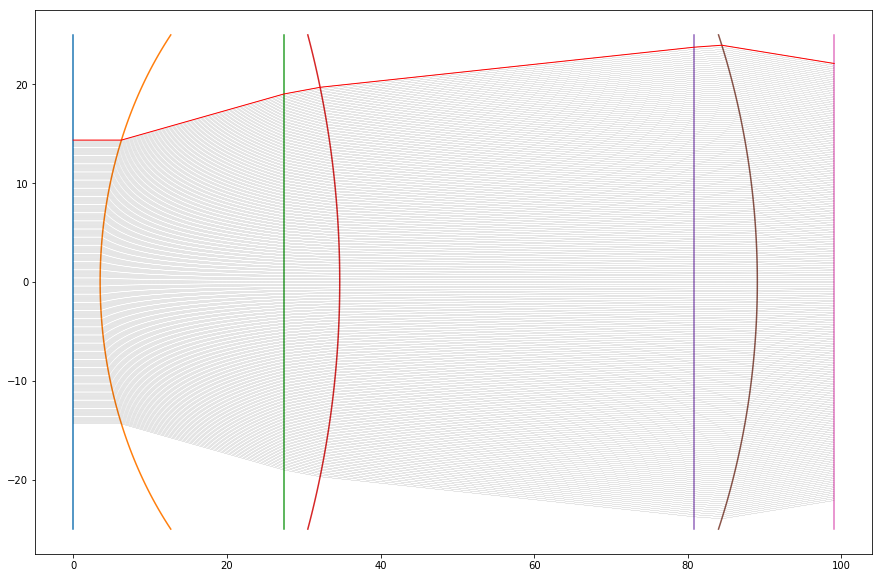

14.357782383


In [9]:
#ls=create_doppelachromat(1000,38.6,1/0.0001,1/0.012)
s=lens_system(10)
s.surfaces=[]
add_monospheric(s,-75,25.01836571,True)
add_monospheric(s,150,26.9803271,True)
#add_monospheric(s,-150,25.01836571,True)
#add_monospheric(s,175,26.9803271,True)
add_monospheric(s,125,10,True)
#s.add_surface(surface(6.6,0,1.456))
#s.add_surface(surface(59,0,1))
s.add_surface(surface(100,0,1))

res=minimize(optimize_lenses_ff,([25,26]), method='Nelder-Mead',tol=1e-4)
print(res)
defaultplot(0)

In [24]:
s.entrance_pupil

13.869442530036384

-99


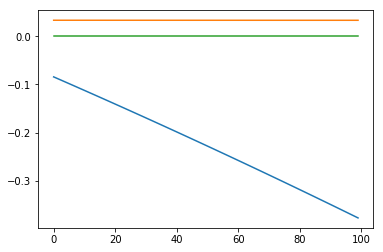

<bound method surface.R of <Beam_trace.surface object at 0x7f9be0c8ae80>>
(500.90514508074921, 0.033311426197995431)


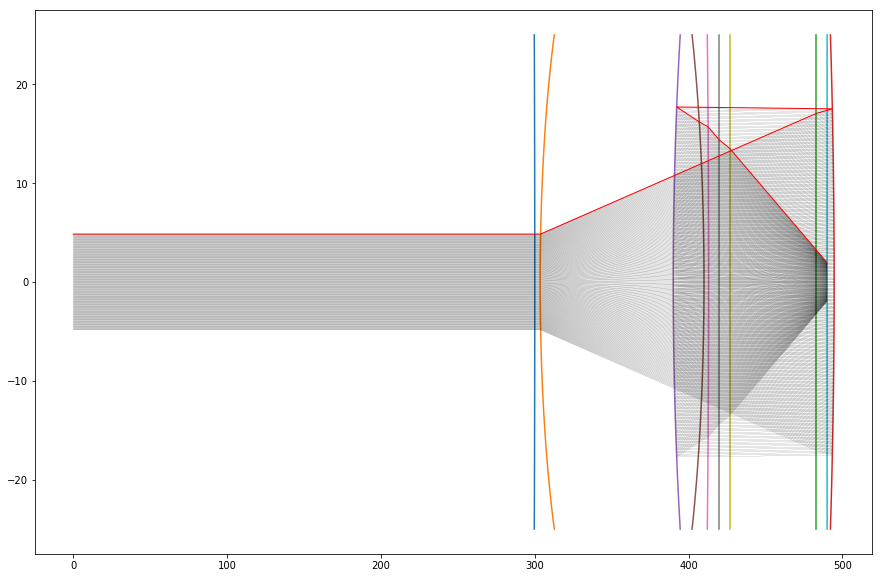

4.84829015426


In [796]:
def optimize_lenses_ff2(ls,x):
    p1=x[0]
    p4=x[1]
  #  ls.surfaces[0].pos=p1-13
  #  ls.surfaces[1].pos=p1-10
    ls.surfaces[0].pos=p1
    ls.surfaces[1].pos=p1+3.5
    ls.surfaces[2].pos=p4+p1
    ls.surfaces[3].pos=p4+11.8+p1
    ls.calculate_marginal()
    mpoint=ls.marginal_ray.Q_p[-4,0,1]
    ls.entrance_pupil = ls.entrance_pupil*15.7/mpoint
    osc=sum(ls.OSC(-0.0074887)[:-1])
    res=ls.circle_of_least_confusion()
    rr=res[1]
    return rr,osc
dat=[]
x=np.linspace(10,300,100)
#ls=create_monoachromat(38.6,-1/0.020,1/0.030)
#ls=create_monoachromat(70,51,1/0.00000001,1/0.013)
#ls=create_monoachromat(-75,-5000,-50,6000)
#ls=create_monoachromat(-7000,38.6,400000,80)
#ls=create_monoachromat(-700005,38.6,400000,65.3)
ls=create_doppelachromat(1000,38.6,100003,130)
for k in x:
    rr,osc=optimize_lenses_ff2(ls,[k,(130-38.6)*2])
    dat.append([rr,osc])

dat=np.array(dat)
plt.plot(dat[:,1])
plt.plot(dat[:,0])
plt.plot(x*0)
print(np.argmin(dat[:,1]**2)-np.argmin(dat[:,0]**2))
plt.show()
defaultplot(0)

In [24]:
ls

<bound method surface.R of <Beam_trace.surface object at 0x7f9be282bef0>>
(492.4811017402962, 0.0086661091328821271)


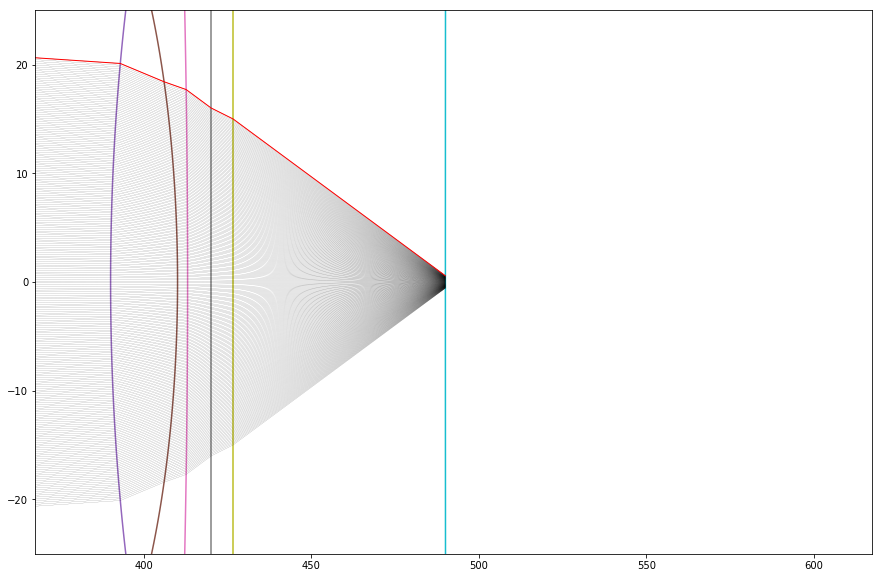

11.1456496799


array([ -1.03426819e-05,   4.26755333e-01,  -6.78827415e-02,
        -2.98880638e-01,  -1.05171367e-01,   2.61072402e-01,
        -2.41472696e-01,   1.07002624e-01,  -1.00215933e-01,
         1.26195212e-03])

In [774]:
defaultplot(25)
ls.OSC(-0.0074887)

In [ ]:

# first working solution
add_monospheric(ls,-75,25.01836571,True)
add_monospheric(ls,150,26.9803271,True)
add_achromat(ls,75,12)
ls.add_surface(surface(6.6,0,1.456))
ls.add_surface(surface(59,0,1))
ls.add_surface(surface(100,0,1))
